# ANN

## 1. MLP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
#데이터 불러오기
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
#데이터 확인
print(iris.data.shape)
iris['data'][:10]

(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [4]:
#데이터 나누기(75%, 25%)
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

112
38
112
38


In [5]:
#정규화
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train[:10]

array([[-1.05059637, -0.14307872, -1.20658689, -1.30669861],
       [-1.17329376,  0.089165  , -1.26353495, -1.30669861],
       [-1.05059637, -2.46551591, -0.12457387, -0.22161802],
       [ 0.42177227, -0.37532244,  0.33101056,  0.1852872 ],
       [-0.43710944,  2.64384591, -1.320483  , -1.30669861],
       [ 0.29907488, -1.0720536 ,  1.07133527,  0.32092227],
       [-1.05059637,  1.01813988, -1.37743106, -1.17106354],
       [ 0.29907488, -0.60756616,  0.1601664 ,  0.1852872 ],
       [-1.05059637,  0.32140872, -1.43437911, -1.30669861],
       [-0.43710944, -1.30429731,  0.1601664 ,  0.1852872 ]])

In [6]:
X_test[:10]

array([[-0.06901728, -0.83980988,  0.786595  ,  0.99909764],
       [-0.55980683,  1.94711475, -1.14963884, -1.03542846],
       [ 0.54446965,  0.78589616,  1.07133527,  1.67727301],
       [ 0.54446965, -0.60756616,  0.786595  ,  0.45655735],
       [-1.29599115, -0.14307872, -1.320483  , -1.44233369],
       [-0.06901728, -0.83980988,  0.786595  ,  0.99909764],
       [-1.17329376, -0.14307872, -1.320483  , -1.30669861],
       [-0.19171467, -1.0720536 , -0.12457387, -0.22161802],
       [-1.05059637,  0.78589616, -1.20658689, -1.03542846],
       [ 2.50762784,  1.71487103,  1.5269197 ,  1.13473272]])

In [7]:
#모델 생성 및 예측
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10)) #3개의 은닉층, 10개씩 노드 할당
mlp.fit(X_train, y_train)

C:\Users\geun\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [8]:
prediction = mlp.predict(X_test)
print(prediction)

[2 0 2 1 0 2 0 1 0 2 0 2 1 0 2 1 1 2 0 2 2 2 1 1 0 1 2 2 2 0 1 0 2 0 1 1 1
 0]


In [9]:
#평가
confusion_matrix(y_test, prediction)

array([[12,  0,  0],
       [ 0,  9,  0],
       [ 0,  3, 14]], dtype=int64)

In [10]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.75      1.00      0.86         9
           2       1.00      0.82      0.90        17

    accuracy                           0.92        38
   macro avg       0.92      0.94      0.92        38
weighted avg       0.94      0.92      0.92        38



In [11]:
accuracy_score(y_test, prediction)

0.9210526315789473

## 2. 활성화함수(Activation Function)

### 1) 계단함수 (Step Function)
- x=0 인 지점에서 미분을 할 수 없다는 점, 그 외 지점에서는 2차까지만 미분이 되고 미분값이 0이 된다는 점의 문제로 거의 사용되지 않는다.

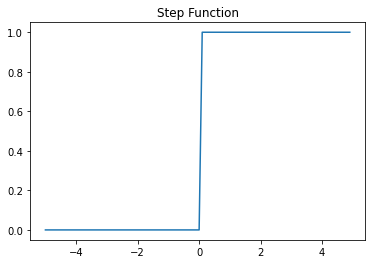

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def step(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step(x)
plt.title('Step Function')
plt.plot(x,y)
plt.show()

### 2) 시그모이드 함수(Sigmoid Function)
- 활성화 함수로 자주 사용
- 문제점 : 미분을 하면 최대 0.25 이하의 값만 나옴. 미분이 여러 번하면(0.25를 계속 곱하면) 점점 0으로 소실되는 문제가 있음

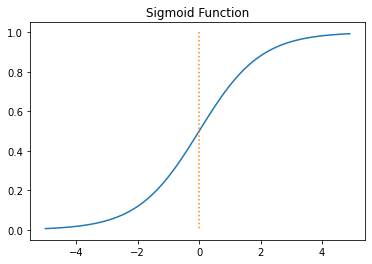

In [13]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0],":")
plt.title("Sigmoid Function")
plt.show()

### 3) 하이퍼볼릭 탄젠트 함수(Hyperbolic Tangent Function)
- -1과 1에 가까운 출력값을 출력할 때, 시그모이드 함수와 같은 문제 발생
- 시그모이드와 달리 0을 중심으로함.
- 시그모이드 함수의 미분 시 최대값(0.25)보다는 최대값이 크기 때문에 기울기 소실 증상이 적다.
- 은닉층에서 시그모이드 함수보다 선호

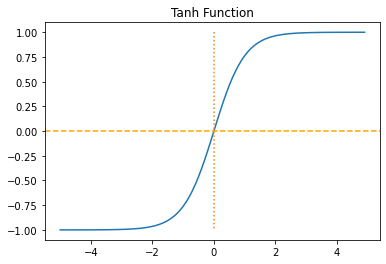

In [14]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.tanh(x)

plt.plot(x,y)
plt.plot([0,0],[1.0,-1.0],":")
plt.axhline(y=0, color='orange',linestyle='--')
plt.title('Tanh Function')
plt.show()

### 4) 렐루 함수(ReLU Function))
- 가장 많이 사용
- 입력값이 음수면 0 출력, 양수면 입력값 그대로 출력.
- 단순 임계값이므로 연산 속도도 빠름
- 단점 : 죽은렐루(dying ReLU) : 입력값이 음수면 기울기(미분값)이 0. 뉴런이 회생불가능

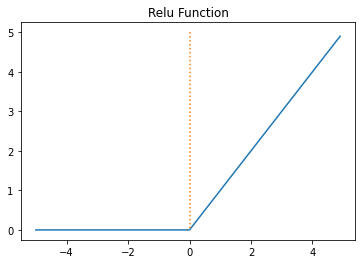

In [15]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x,y)
plt.plot([0,0],[5.0,0.0],":")
plt.title('Relu Function')
plt.show()

### 5) 리키 렐루 함수(Leaky ReLU Fuction)
- 렐루함수의 죽은 렐루 보완하기 위한 변형 함수
- 입력값이 음수일 경우 0이 아니라 0.001과 같은 매우 작은 수 반환
- f(x) = max(ax,x) : a는 하이퍼파라미터. '새는(leaky) 정도' 조정

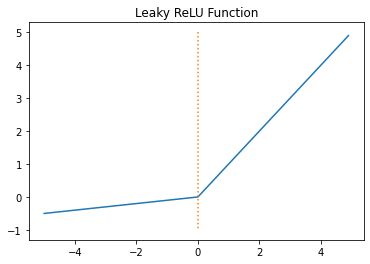

In [16]:
def leaky_relu(x):
    return np.maximum(a*x, x)

a=0.1
x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,-1.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

## 3. CNN 실습
- MNIST 분류
    - 1번 레이어 : 합성곱층(Convolutional layer)
        - 합성곱(in_channel = 1, out_channel = 32, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
        - 맥스풀링(kernel_size=2, stride=2))

    - 2번 레이어 : 합성곱층(Convolutional layer)
        - 합성곱(in_channel = 32, out_channel = 64, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
        - 맥스풀링(kernel_size=2, stride=2))

    - 3번 레이어 : 전결합층(Fully-Connected layer)
        - 특성맵을 펼친다. # batch_size × 7 × 7 × 64 → batch_size × 3136
        - 전결합층(뉴런 10개) + 활성화 함수 Softmax

In [31]:
# !pip install torch
# !pip install torchvision

In [19]:
import torch
import torch.nn as nn

In [18]:
torch.__version__

'2.0.0+cpu'

In [20]:
# 임의의 텐서 만들기 (1 * 1 * 28 * 28)
inputs = torch.Tensor(1,1,28,28)
print('텐서의 크기 :{}'.format(inputs.shape))

텐서의 크기 :torch.Size([1, 1, 28, 28])


In [21]:
#합성곱층(1 layer)
conv1 = nn.Conv2d(1, 32, 3, padding=1)
print("합성곱층 1 layer : {}".format(conv1))

#합성곱층(2 layer)
conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
print("합성곱층 2 layer : {}".format(conv1))

#맥스풀링
pool = nn.MaxPool2d(2)
print("Maxpooling : {}".format(pool))

합성곱층 1 layer : Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
합성곱층 2 layer : Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Maxpooling : MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)


In [23]:
# conv1, pooling, cov2, pooling 순서로 출력 만들기
out = conv1(inputs)
print(out.shape)

out = pool(out)
print(out.shape)

out = conv2(out)
print(out.shape)

out = pool(out)
print(out.shape)

torch.Size([1, 32, 28, 28])
torch.Size([1, 32, 14, 14])
torch.Size([1, 64, 14, 14])
torch.Size([1, 64, 7, 7])


In [24]:
# 하나 차원씩 출력
print(out.size(0)) #첫번째 차원
print(out.size(1)) #두번째 차원
print(out.size(2)) #셋번째 차원
print(out.size(3)) #번째 차원

1
64
7
7


In [25]:
# 텐서 펼치기
out = out.view(out.size(0), -1)
print(out.shape)

torch.Size([1, 3136])


In [26]:
# 전결합층 통과 (출력층으로 10개 뉴런 배치하여 10개 차원의 텐서로 변환)
fc = nn.Linear(3136, 10)
out = fc(out)
print(out.shape)

torch.Size([1, 10])


In [32]:
# MNIST 분류
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

In [33]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

#랜덤 시드 고정
torch.manual_seed(777)

#GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [34]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100 #배치사이즈가 크면 듬성듬성 돌려서 성능이 낮아짐

In [35]:
mnist_train = dsets.MNIST(root='MNIST_data/', #다운로드 경로
                          train=True,  #훈련데이터로 다운로드
                          transform=transforms.ToTensor(), #텐서로 변환
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False, #테스트 데이터로 다운로드
                         transform=transforms.ToTensor(),
                         download=True)

  3%|██                                                                  | 294912/9912422 [00:00<00:03, 2937469.02it/s]

100%|███████████████████████████████████████████████████████████████████| 9912422/9912422 [00:01<00:00, 7449417.17it/s]


Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/MNIST\raw


  0%|                                                                                        | 0/28881 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 10915092.25it/s]


Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



  0%|                                                                                      | 0/1648877 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 5243534.30it/s]


Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 2282047.05it/s]

Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



In [36]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [37]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        # 첫번째층
        # ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 두번째층
        # ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 전결합층 7x7x64 inputs -> 10 outputs
        self.fc = torch.nn.Linear(7 * 7 * 64, 10, bias=True)

        # 전결합층 한정으로 가중치 초기화
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)   # 전결합층을 위해서 Flatten
        out = self.fc(out)
        return out

In [38]:
# CNN 모델 정의
model = CNN().to(device)

In [39]:
criterion = torch.nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [40]:
total_batch = len(data_loader)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 600


In [41]:
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

[Epoch:    1] cost = 0.22562705
[Epoch:    2] cost = 0.0630102158
[Epoch:    3] cost = 0.0463018902
[Epoch:    4] cost = 0.0374556705
[Epoch:    5] cost = 0.0313643441
[Epoch:    6] cost = 0.0259706657
[Epoch:    7] cost = 0.021776244
[Epoch:    8] cost = 0.0182836782
[Epoch:    9] cost = 0.0161042772
[Epoch:   10] cost = 0.0133900568
[Epoch:   11] cost = 0.00968091376
[Epoch:   12] cost = 0.00999730639
[Epoch:   13] cost = 0.00827130955
[Epoch:   14] cost = 0.00604190631
[Epoch:   15] cost = 0.00732163386


In [42]:
# 학습을 진행하지 않을 것이므로 torch.no_grad()
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

C:\Users\geun\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\geun\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9869999885559082
